## Initial Strat Files for SalishSeaLake
### May 17, 2017

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import timeseries_tools

In [2]:
dropped_variables = ['area','bounds_lon','bounds_lat','deptht_bounds','sossheig',
                     'time_centered_bounds','time_counter_bounds','buoy_n2','mixed_depth']
insert_number_here = 3
ones = np.ones((40,898,398))
mesh_mask = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
t_mask = mesh_mask.tmask.squeeze('t')

example = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/TS20mar2016DeepSmooth.nc')
example

<xarray.Dataset>
Dimensions:       (deptht: 40, time_counter: 1, x: 398, y: 898)
Coordinates:
    nav_lat       (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 ...
    nav_lon       (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
  * deptht        (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
  * time_counter  (time_counter) float32 9.96921e+36
Dimensions without coordinates: x, y
Data variables:
    vosaline      (time_counter, deptht, y, x) float32 0.0 0.0 0.0 0.0 0.0 ...
    votemper      (time_counter, deptht, y, x) float32 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    Conventions:  CF-1.6
    title:        Salinity Temperature Initial Conditions based on Mar 20, 20...
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       https://bitbucket.org/salishsea/tools/src/tip/FindTSforSmoo...
    references:   REQUIRED
    comment:      Salinity and Temperature conditions from  Mar 20, 2016 23:0...
    history:      [2016-0

### January data

In [3]:
timerange1 = ['2017-01-01','2017-02-01']
Jan_time_series = timeseries_tools.make_filename_list(timerange1,'T',model = 'nowcast-green',resolution='d')
Jan_data = xr.open_mfdataset(Jan_time_series)
averaged_in_time_Jan = Jan_data.mean(dim='time_counter')
new1 = averaged_in_time_Jan.drop(dropped_variables)
new3 = new1.assign_coords(time_counter = insert_number_here).expand_dims('time_counter',1)
new4 = new3.squeeze('time_counter')
new5 = new4.where(new4.vosaline != 0).mean(['x','y'],skipna = True)

saline = new5.vosaline.values
saline = np.expand_dims(saline,axis=1)
saline = np.expand_dims(saline,axis=2)
saline = saline*ones

temp = new5.votemper.values
temp= np.expand_dims(temp,axis=1)
temp = np.expand_dims(temp,axis=2)
temp = temp*ones

nav_lon2 = new4.nav_lon.values
nav_lat2 = new4.nav_lat.values
deptht2 = new4.deptht.values

new_winter = xr.Dataset({'vosaline':(['deptht','y','x'], saline),
                         'votemper':(['deptht','y','x'],temp)},
                        coords={'deptht':(['deptht'], deptht2), 
                                'nav_lat':(['y','x'], nav_lat2),
                                'nav_lon':(['y','x'], nav_lon2),
                                'time_counter': 3})

new_winter

/home/vdo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.Dataset>
Dimensions:       (deptht: 40, x: 398, y: 898)
Coordinates:
  * deptht        (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    nav_lat       (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 ...
    nav_lon       (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
    time_counter  int64 3
Dimensions without coordinates: x, y
Data variables:
    vosaline      (deptht, y, x) float64 26.97 26.97 26.97 26.97 26.97 26.97 ...
    votemper      (deptht, y, x) float64 6.055 6.055 6.055 6.055 6.055 6.055 ...

In [23]:
new_winter.to_netcdf('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/winter2017_notmasked.nc')

syncing


In [3]:
new_winter = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/winter2017_notmasked.nc')

In [4]:
nav_lon2 = new_winter.nav_lon.values
nav_lat2 = new_winter.nav_lat.values
deptht2 = new_winter.deptht.values

In [4]:
Jan_saline_array = new_winter.vosaline.values
Jan_saline_array[t_mask.values == 0] = 0
Jan_temp_array = new_winter.votemper.values
Jan_temp_array[t_mask.values == 0] = 0

final_winter = xr.Dataset({'vosaline':(['deptht','y','x'], Jan_saline_array),
                           'votemper':(['deptht','y','x'],Jan_temp_array)},
                          coords={'deptht':(['deptht'], deptht2), 
                                'nav_lat':(['y','x'], nav_lat2),
                                  'nav_lon':(['y','x'], nav_lon2),
                                'time_counter': 3})

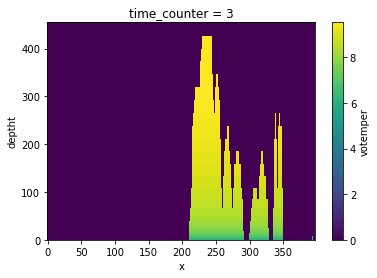

In [5]:
final_winter.votemper.isel(y=500).plot()

In [9]:
final_winter.to_netcdf('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/winter2017_201702.nc')

syncing


In [2]:
final_winter = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/winter2017.nc')

### June data

In [6]:
timerange2 = ['2016-06-01','2016-07-01']
Jun_time_series = timeseries_tools.make_filename_list(timerange2,'T',model='nowcast-green',resolution='d')
Jun_data = xr.open_mfdataset(Jun_time_series)
averaged_in_time_Jun = Jun_data.mean(dim='time_counter')
newa = averaged_in_time_Jun.drop(dropped_variables)
newb = newa.assign_coords(time_counter = insert_number_here).expand_dims('time_counter',1)
newc = newb.squeeze('time_counter')
newd = newc.where(newc.vosaline != 0).mean(['x','y'],skipna = True)

saline_Jun = newd.vosaline.values
saline_Jun = np.expand_dims(saline_Jun,axis=1)
saline_Jun = np.expand_dims(saline_Jun,axis=2)
saline_Jun = saline_Jun*ones

temp_Jun = newd.votemper.values
temp_Jun = np.expand_dims(temp_Jun,axis=1)
temp_Jun = np.expand_dims(temp_Jun,axis=2)
temp_Jun = temp_Jun*ones

nav_lon_Jun = newc.nav_lon.values
nav_lat_Jun = newc.nav_lat.values
deptht_Jun = newc.deptht.values

new_summer = xr.Dataset({'vosaline':(['deptht','y','x'], saline_Jun),
                         'votemper':(['deptht','y','x'],temp_Jun)},
                        coords={'deptht':(['deptht'], deptht_Jun), 
                                'nav_lat':(['y','x'], nav_lat_Jun),
                                'nav_lon':(['y','x'], nav_lon_Jun),
                                'time_counter': 3})
new_summer

/home/vdo/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.Dataset>
Dimensions:       (deptht: 40, x: 398, y: 898)
Coordinates:
  * deptht        (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    nav_lat       (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 ...
    nav_lon       (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
    time_counter  int64 3
Dimensions without coordinates: x, y
Data variables:
    vosaline      (deptht, y, x) float64 23.37 23.37 23.37 23.37 23.37 23.37 ...
    votemper      (deptht, y, x) float64 14.31 14.31 14.31 14.31 14.31 14.31 ...

In [25]:
new_summer.to_netcdf('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/summer2016_notmasked.nc')

syncing


In [7]:
new_summer = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/summer2016_notmasked.nc')

In [7]:
nav_lon_Jun = new_summer.nav_lon.values
nav_lat_Jun = new_summer.nav_lat.values
deptht_Jun = new_summer.deptht.values

Jun_saline_array = new_summer.vosaline.values
Jun_saline_array[t_mask.values == 0] = 0
Jun_temp_array = new_summer.votemper.values
Jun_temp_array[t_mask.values == 0] = 0

final_summer = xr.Dataset({'vosaline':(['deptht','y','x'], Jun_saline_array),
                           'votemper':(['deptht','y','x'],Jun_temp_array)},
                          coords={'deptht':(['deptht'], deptht_Jun), 
                                  'nav_lat':(['y','x'], nav_lat_Jun),
                                  'nav_lon':(['y','x'], nav_lon_Jun),
                                  'time_counter': 3})

final_summer

<xarray.Dataset>
Dimensions:       (deptht: 40, x: 398, y: 898)
Coordinates:
  * deptht        (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
    nav_lat       (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 ...
    nav_lon       (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
    time_counter  int64 3
Dimensions without coordinates: x, y
Data variables:
    vosaline      (deptht, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    votemper      (deptht, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

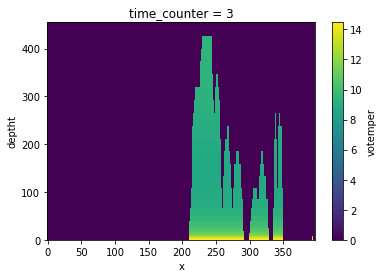

In [8]:
final_summer.votemper.isel(y=500).plot()

In [10]:
final_summer.to_netcdf('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/summer2016_201702.nc')

syncing


Making initial strat files for SalishSeaLake. Links may be dead after new repos come out for seperated NEMO-forcing. 